# Lecture 10 - Spring 2024

Data Science, Spring 2024

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D

In [128]:
# Big font helper
def adjust_fontsize(size=None):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    if size != None:
        SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Evaluate the Simple Linear Regression Model

We will first define some helper functions to calculate the regression line for us.

In [130]:
# Helper functions
# define standard unit function
def standard_units(x):
     return ((x - mean_x) / std_x) 
# define correlation function
def correlation(x, y):
     # Calculate the mean of X and Y
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Calculate the standard deviation of X and Y
    std_x = np.std(x)
    std_y = np.std(y)
    
    # Calculate the Pearson correlation coefficient
    n = len(x)
    numerator = np.sum(((x - mean_x) / std_x) * ((y - mean_y) / std_y))
    denominator = n
    r = numerator / denominator
    
    return r
# define slope function
def slope(x, y):
        #r into sd of y/sd of x
        r = correlation(x,y)
        s = r * (np.std(y)/np.std(x))
        return s
        
# define intercept function
def intercept(x, y):
    s = slope(x,y)
    i = np.mean(y) - s * np.mean(x)
    return i
# define fit_least_squares function
def fit_least_squares(x, y):
    
    r = correlation(x,y)
    theta_1 = slope(x,y)
    theta_0 = intercept(x,y)
    return theta_0, theta_1

# define predict function
def predict(x, theta_0, theta_1):
    # code Here
    yhat = theta_0 + theta_1 * x
    return yhat

# define mse function
def compute_mse(y, yhat):
  # Here code
    squared_errors = (y- yhat) ** 2
    
    # Calculate the mean of squared errors
    mse = np.mean(squared_errors)
    return mse


In [131]:
plt.style.use('default') # Revert style to default mpl
NO_VIZ, RESID, RESID_SCATTER = range(3)
def least_squares_evaluation(x, y, visualize=NO_VIZ):
   # Calculate least squares coefficients
    ahat, bhat = fit_least_squares(x, y)
    # Calculate predicted values
    yhat = predict(x, ahat, bhat)
    # Calculate residuals
    residuals = y - yhat
    # Performance metrics
    mse = compute_mse(y, yhat)
    correlation_coefficient = correlation(x, y)
    # Visualization
    if visualize == RESID:
        fig, ax = plt.subplots()
        ax.scatter(x, residuals, color='blue', alpha=0.7)
        ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
        ax.set_xlabel('Independent Variable (x)')
        ax.set_ylabel('Residuals')
        ax.set_title('Residuals Plot')
    elif visualize == RESID_SCATTER:
        fig, ax = plt.subplots()
        ax.scatter(yhat, residuals, color='green', alpha=0.7)
        ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
        ax.set_xlabel('Predicted Values')
        ax.set_ylabel('Residuals')
        ax.set_title('Residuals vs. Predicted Values')
    else:
        fig, ax = plt.subplots()
        ax.scatter(x, y, color='red', label='Actual', alpha=0.7)
        ax.plot(x, yhat, color='blue', label='Fitted Line', linewidth=2)
        ax.set_xlabel('Independent Variable (x)')
        ax.set_ylabel('Dependent Variable (y)')
        ax.legend()
        ax.set_title('Least Squares Linear Regression Fit')
    plt.show()
    return fig

Let's look at four different datasets. Without visualizing the data, let's try fitting the simple linear regression model to these four datasets!

In [133]:
# Load in four different datasets: I, II, III, IV
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

# create dataframes
df1=pd.DataFrame({'x':x, 'y':y1})
df2=pd.DataFrame({'x':x, 'y':y2})
df3=pd.DataFrame({'x':x, 'y':y3})
df4=pd.DataFrame({'x':x4, 'y':y4})

In [134]:
anscombe = {
    'df1': pd.DataFrame({'x': x, 'y': y1}),
    'df2': pd.DataFrame({'x': x, 'y': y2}),
    'df3': pd.DataFrame({'x': x, 'y': y3}),
    'df4': pd.DataFrame({'x': x4, 'y': y4})
}

In [135]:
for i, dataset in enumerate(['df1', 'df2', 'df3', 'df4']):
    ans = anscombe[dataset]
    x, y = ans["x"], ans["y"]
    ahat, bhat = fit_least_squares(x, y)
    print(f"Dataset {dataset}: theta_0: {ahat:.2f}, theta_1: {bhat:.2f}")

Dataset df1: theta_0: 3.00, theta_1: 0.50
Dataset df2: theta_0: 3.00, theta_1: 0.50
Dataset df3: theta_0: 3.00, theta_1: 0.50
Dataset df4: theta_0: 3.00, theta_1: 0.50


Looks like all four datasets have exactly the same fit.

In fact, all four of them have the same $\bar x$, $\bar y$, $\sigma_x$, $\sigma_y$, correlation $r$, and RMSE! If we only look at these statistics, we will probably be inclined to say that these datasets are similar.

>>> Dataset df1:


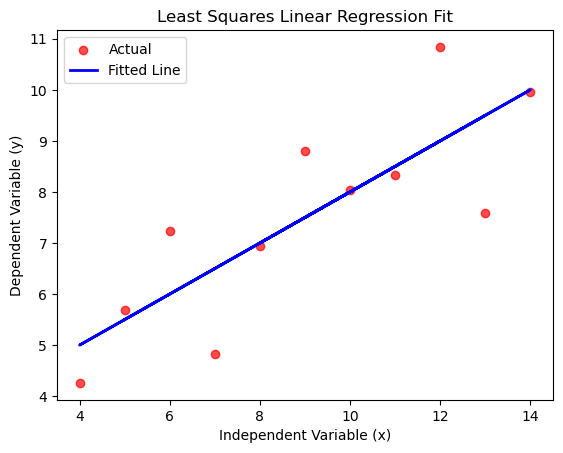



>>> Dataset df2:


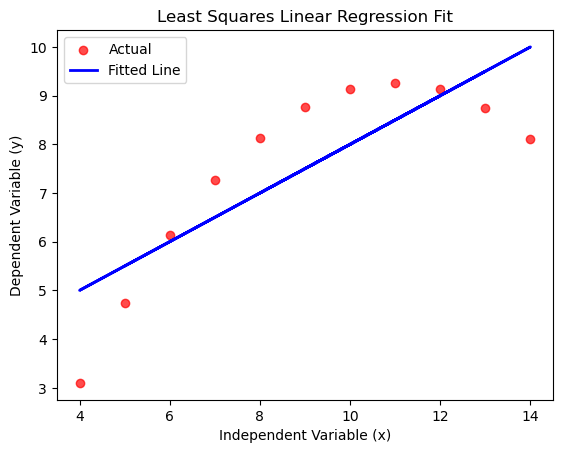



>>> Dataset df3:


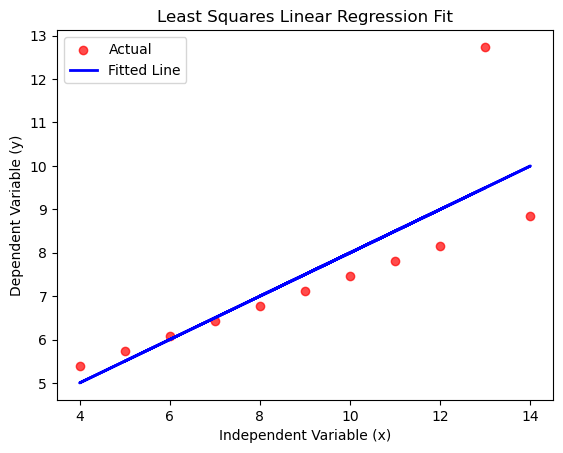



>>> Dataset df4:


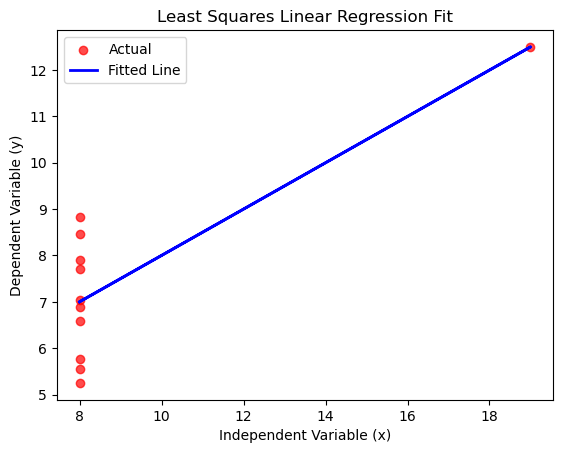

In [137]:
for dataset in ['df1', 'df2', 'df3', 'df4']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize = NO_VIZ)
    print()
    print()

However, it is only when we visualize the datasets that we realize only one of these four sets of data makes sense to model using SLR.

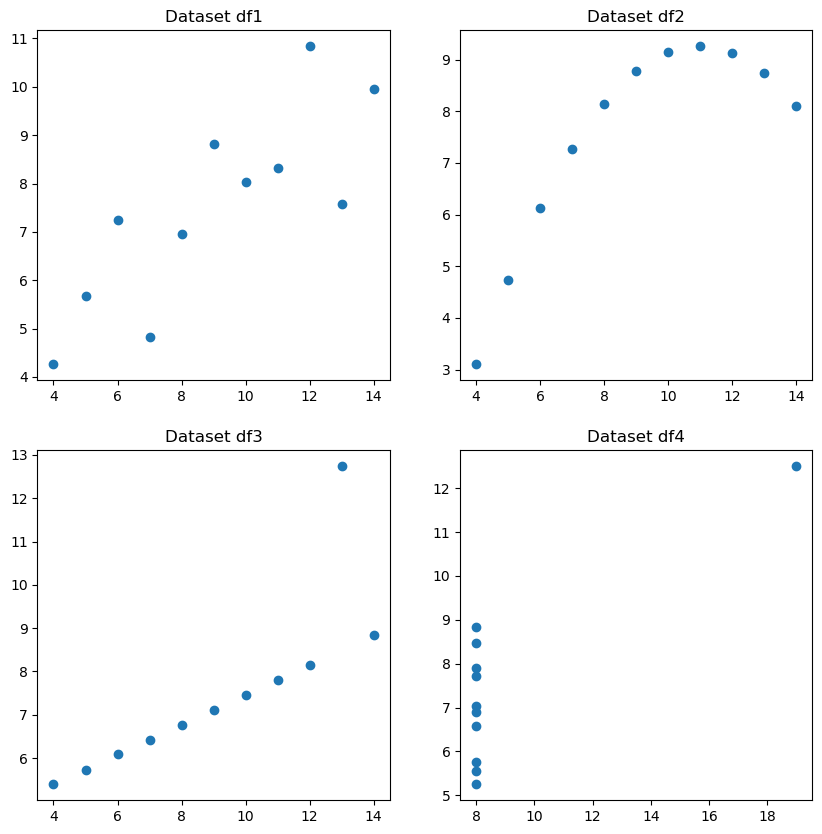

In [139]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

for i, dataset in enumerate(['df1', 'df2', 'df3', 'df4']):
    ans = anscombe[dataset]
    axs[i//2, i%2].scatter(ans['x'], ans['y'])
    axs[i//2, i%2].set_title(f"Dataset {dataset}")

plt.show()

Checking the residuals will also shed light on the differences among these four datasets.

If you remember from Data 8, "the residual plot of a good regression shows no pattern".

>>> Dataset df1:


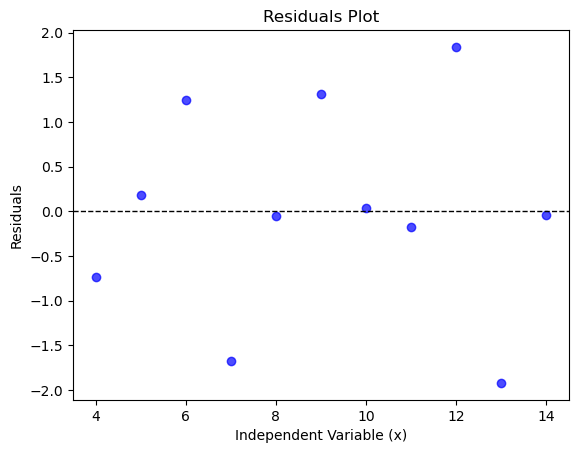



>>> Dataset df2:


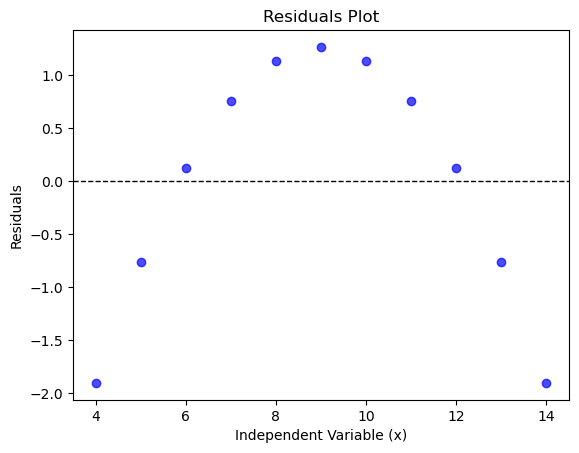



>>> Dataset df3:


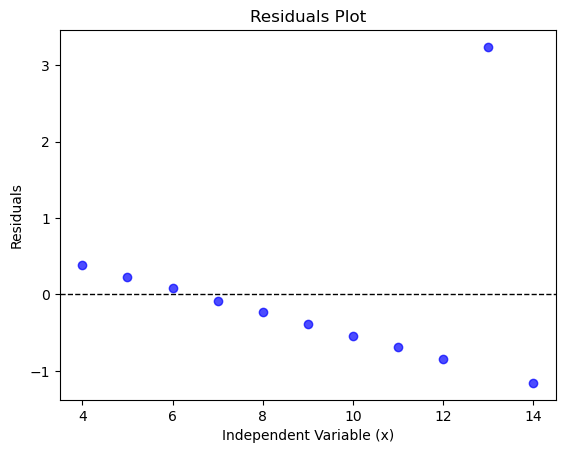



>>> Dataset df4:


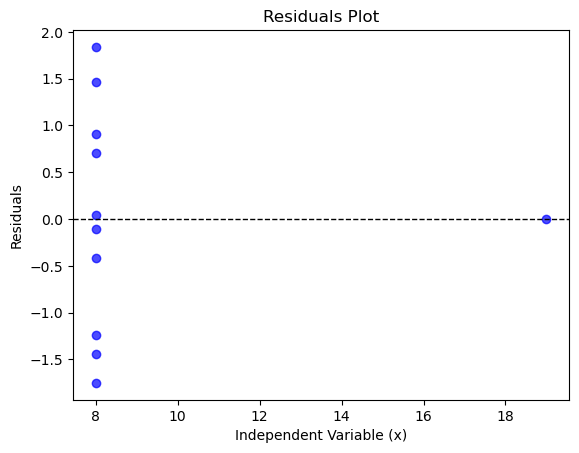

In [141]:
for dataset in ['df1', 'df2', 'df3', 'df4']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize = RESID)
    plt.show(fig)
    
    print()
    print()

The takeaway here is that you should always visualize your datasets before fitting any models to it!